# **Tarea Semanal 0**: *Primeros pasos en la Simulación*

## Alumna: Salgado, Victoria Jazmín 
### Análisis y Procesamiento de Señales, 2c2025

## **Resumen**
El objetivo de este trabajo práctico fue diseñar un generador de señales.  

Se comenzó por un generador de señales senoidales, que permitiera parametrizar:

- La amplitud máxima de la senoidal (volts)
- Su valor medio (volts)
- La frecuencia (Hz)
- La fase (radianes)
- La cantidad de muestras digitalizada por el ADC (# muestras)
- La frecuencia de muestreo del ADC


## **Introducción Teórica**

La onda senoidal generada se considera una señal analógica, pero al representarla en la computadora la estamos convirtiendo en una señal digital generada a partir de una secuencia discreta, es decir, de finitas muestras.
Estas muestras son las que toma el ADC mencionado arriba (Analog-Digital converter). 
Se busca diseñar un generador que permita parametrizar para obtener diferentes señales y observar también los efectos que aparecen cuando no se cumple el teorema del muestreo  de Nyquist-Shannon. En éste se estipula que para poder reconstruir la señal original correctamente, la relación entre $ f_{s} $ (la frecuencia de muestreo) y $ f_{f}$ (la frecuencia más alta que contenga la señal) debe ser la siguiente:

### $$
f_{s} \geq 2 f_{f} \; [\text{1}]
$$

 






## **Desarrollo**
Para diseñar el generador se utilizó el software Spyder. 
Se importaron las siguientes librerías


In [5]:
import numpy as np
import matplotlib.pyplot as plt

Donde numpy se utilizó para poder acceder a la función seno y también para poder generar arrays. 
Matplotlib fue necesaria para poder graficar luego la señal senoidal. 

Se comienza luego por definir la función que se va a usar para generar la señal:

In [20]:
def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, N=1000, fs=1000):
    Ts = 1/fs
    tt = np.arange(0, N*Ts, Ts)
    #print(tt)
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    return tt, xx

*mi_funcion_sen* toma como parámetros, de izquierda a derecha:

- vmax: amplitud máxima de la onda
- dc: valor medio
- ff: la frecuencia de la señal
- ph: la fase en radines
- N: el número de muestras que se desea tomar
- fs: la frencuencia de muestreo deseada.
  
Observación: al definir la función se hace con los valores default indicados. Al llamar a la función con otros parámetros, se ejecutará con estos últimos como se verá luego. 

Se continúa por establecer Ts, que será el período de sampleo, como la inversa de la frecuencia de sampleo.
Luego se genera el vector de tiempos en los cuales se tomarán las muestras. Se comenzará desde t=0 y para establecer su duración  se hace:

$$
N \cdot T_{s} \; [\text{s}] = t_{f}  [\text{s}] 
$$

Y se establece un paso de Ts, ya que justamente el período de sampleo establece cada cuanto tiempo se toma una muestra. Entonces, para establecer el array tenemos de izquierda a derecha: tiempo inicial, tiempo final, paso. 

Después se genera el vector de resultados para cada tiempo, xx, que surge de evaluar la función seno en cada uno de los puntos del array tt detallado anteriormente. Cabe destacar que se multiplica a la ff por 2pi*t siendo t el tiempo en segundos de la muestra para obtener [rad] como unidad.

La función entonces devuelve los arrays tt y xx, que serán graficados luego. 


Se procede a llamar a la función. Se eligieron N=1000 Y fs=1000 para ver un ciclo en un segundo.

In [21]:
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, N=1000, fs=1000)

Obs.: Se imprime el vector de tiempos (lo hice una vez y luego dejé la línea de código comentada) para poder corroborar que no se tomen puntos del ciclo siguiente (el último valor debe ser N-1/fs)).

Por ultimo, se grafica la onda:

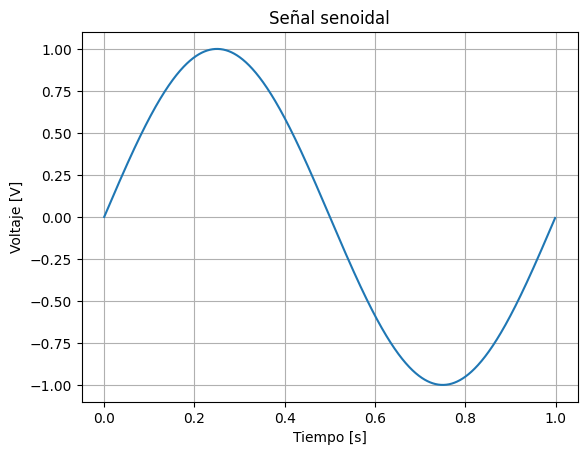

In [22]:
plt.plot(tt, xx)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('Señal senoidal')
plt.grid(True)
plt.show()

Una vez logrado esto, se procedió a experimentar con diferentes $ f_{f}$, para observar los efectos que produce cambiar la relación entre ésta última y una frecuencia de sampleo fija de 1000Hz.

### Caso 1:

In [23]:
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=500, ph=0, N=1000, fs=1000)

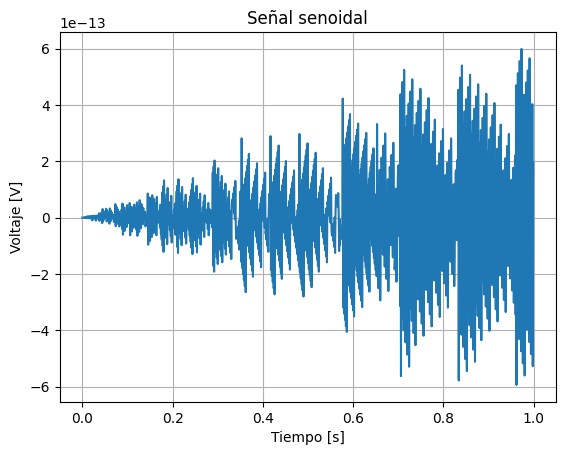

In [24]:
plt.plot(tt, xx)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('Señal senoidal')
plt.grid(True)
plt.show()

## Caso 2:

In [25]:
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=999, ph=0, N=1000, fs=1000)

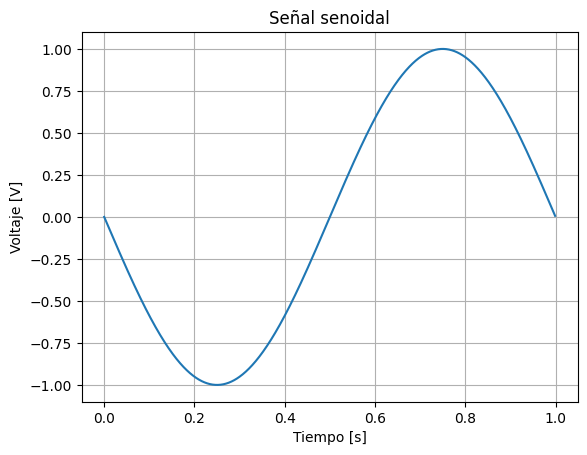

In [26]:
plt.plot(tt, xx)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('Señal senoidal')
plt.grid(True)
plt.show()

## Caso 3:

In [30]:
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=1001, ph=0, N=1000, fs=1000)

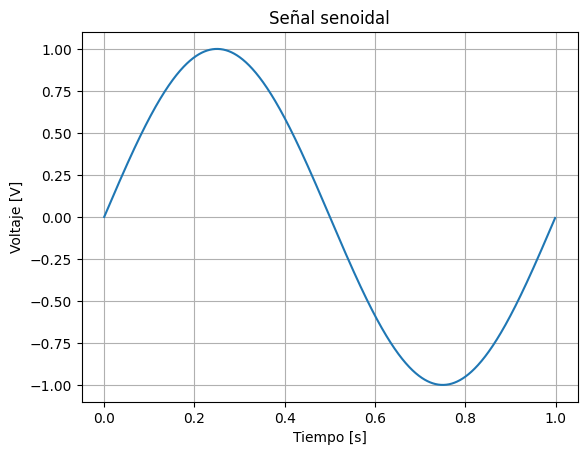

In [31]:
plt.plot(tt, xx)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('Señal senoidal')
plt.grid(True)
plt.show()

## Caso 4:

In [32]:
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=2001, ph=0, N=1000, fs=1000)

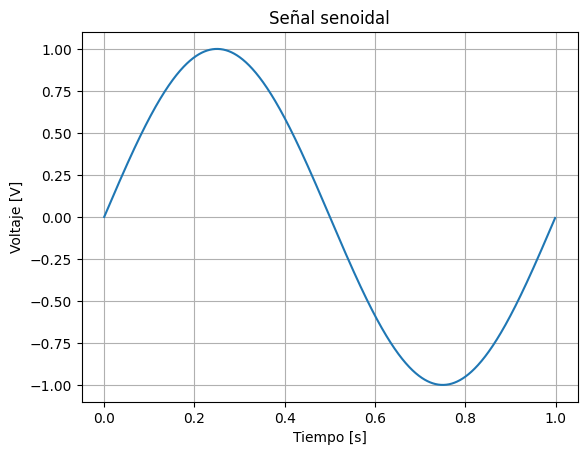

In [33]:
plt.plot(tt, xx)
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('Señal senoidal')
plt.grid(True)
plt.show()

En los últimos 4 casos, se observa el fenómeno llamado *Aliasing*. 

Este sucede cuando no se cumple la relación (ec. [1]) establecida por el teorema del muestreo. 
Para cada caso:

1. ff=500Hz      fs=1000Hz 
2. ff=999Hz      fs=1000Hz 
3. ff=1001Hz     fs=1000Hz
4. ff=2001Hz     fs=1000Hz

Sucede que cuando las muestras tomadas no son las suficientes para mostrar la frecuencia real, se están toman muestras en diferentes puntos del período de la señal, generando un movimiento oscilatorio diferente al original. Según cuál sea la frecuencia ff, este fenómeno se visualiza de diferentes maneras, en el primer caso la escala de voltaje se hace más pequeña y se observan oscilaciones irregulares cerca del 0. En el caso 2, la onda se ve a contrafase de la original, y en el 3er y 4to caso se ven iguales a la onda de 1Hz, frecuencia que no es la de la señal original que se desea reconstruir.

# **Conclusiones**

Se logró diseñar el generador de señales senoidales exitosamente. 
Personalmente la realización de la experiencia me ayudó a comprender mejor los conceptos teóricos y a familiarizarme con el uso de Spyder (y Python) y con el Jupyter Notebook.